# Project Report 4: Diffusion-Limited Aggregation
## Author: Sophie Chun
### Date: Apr 20, 2020
### Other group members: N/A
The objective of this project to simulate diffusion limited aggregation (DLA). 

### Introduction
Diffusion-limited aggregation (DLA) is the process when the particles undergo a random walk due to Brownian motion and cluster together to form an aggregation of the particles. It is a *diffusion process* since the particles randomly wander around before getting attached, *aggregated*, to the cluster. It is also *diffusion-limited* since the particles do not attach each other and rather attach to the cluster one particle at a time. DLA cluster model can be observed in many natural systems such as electrodeposition, the path taken by lightening, growth of some crystals, and snowflake.

### Model considerations
Simulating DLA involves the most important feature of the nature, stochasticity. The particle is initially displaced at an infinite distance away from the structure. They keep moving randomly until it finds the structure, collides, and cluster to it. Once the it forms an aggregation with the structure, it is settled and no longer moves around. This procedure repeats itself over and over until all the particles are successfully aggregated.

To avoid excessive exception checks, a certain size of lattice is created, where the particles can move around. The seed (first particle of the structure) is always centered at the lattice. The particle is created at random position on the circle whose radius is slightly bigger than the maximum structure radius, assuming that the structure is in a shape of circle.

The model is a stochastic and dynamic model as the focus of this project is on the evolution of the aggregation that are created by randomly walking particles.

### Model Implementation
Model implementation involves several steps to minimize the errors: initialzing the parameters, checking for initial exceptions, introducing functions start_walker and run_walker, and several verification steps to ensure that the code works and simulate DLA with various parameters.

#### Initialization of Parameters and Function

In [16]:
import numpy as np
import numpy.random as nprnd
import matplotlib.pyplot as plt
from html_movie import movie

In [17]:
N_walkers = 100                   # how many walkers in a cluster
L = 100                           # lattice size
lattice = np.zeros((L,L))         # the lattice itself
cluster_maxrad = 23               # maximum cluster radius
lattice[int(L/2), int(L/2)] = 1   # seeding the DLA cluster
file_name = "{:03d}_movie.jpg"    # saving jpg

#### Initial Exception Check

In [18]:
ErrVal = 0 # to keep track of whether any error is encountered or not, initial value 

if N_walkers <= 0 :
    print("N_walkers value is invalid. Number of particles must be a positive value.")
    ErrVal = 1;
elif L <= 0:
    print("L value is invalid. The size of the lattice should be a positive value.")
    ErrVal = 1;
elif cluster_maxrad >= (L/2):
    print("cluster_maxrad is invalid. Cluster's maximum radius should less than the half of the lattice size.")
    ErrVal = 1;
else:
    ErrVal = 0;

#### Random Walk
Random walk is consisted up with two functions, start_walker and run_walker. The first function start_walker returns the initial position of the particle. It is constrained to be placed on the imaginary circle that has a slightly bigger radius than the maximum cluster radius. The second function run_walker returns the lattice after all the particles meet the structure and form an aggregation. The particle can move only in one direction among four - up, down, left, and right. If the particle tries to exit the circle when it is first released, then the function stops and run over until it finds the particle getting closer to the structure. Also, if the particle tries to move out of the lattice, then the function again stops and runs over.

In [21]:
# This function returns the initial position of the particle.
def start_walker(lattice, cluster_maxrad):
    L = lattice.shape[0]           # lattice size
    r = 1 + cluster_maxrad         # radius of the imaginary circle where the particle can be created
    theta = nprnd.random()*2*np.pi # random angle
    x = int(r*np.cos(theta)+L/2)   # x coordinate
    y = int(r*np.sin(theta)+L/2)   # y coordinate
    return(x,y)

In [22]:
# This function returns the lattice when the particle meets the structure and forms an aggregation.
def run_walker(lattice, cluster_maxrad):
    x, y = start_walker(lattice, cluster_maxrad)
    while(True):
        # This while loop is executed until the particle meets the cluster around itself.
        while(True):
            # This while loop creates dx and dy that satisfies the condition.
            # resultant x and y should not touch the edge of the lattice.
            directions = np.floor(nprnd.random(1)*4)
            dx = (directions == 0) - 1.0*(directions == 1)
            dy = (directions == 2) - 1.0*(directions == 3)
            if(1 < (x + int(dx)) and (x + int(dx)) < (L-1) and 1 < (y + int(dy)) and (y + int(dy)) < (L-1) ):
                x = x + int(dx)
                y = y + int(dy)
                break
        neighbors_cluster = lattice[x,y+1] + lattice[x,y-1] + lattice[x+1,y] + lattice[x-1,y]
        if(neighbors_cluster > 0):
            lattice[x,y] = 1
            break
    return(lattice)

#### Animation and the Final Cluster
Below, the final cluster is shown, and the animation for every attachment events is also created. Because of the execution time, the cluster size is left to be small.

Attached walker No. 0
Attached walker No. 10
Attached walker No. 20
Attached walker No. 30
Attached walker No. 40
Attached walker No. 50
Attached walker No. 60
Attached walker No. 70
Attached walker No. 80
Attached walker No. 90



Found 100 files of the format *.jpg.

Making HTML code for displaying 000_movie.jpg, 001_movie.jpg, 002_movie.jpg, 003_movie.jpg, 004_movie.jpg, 005_movie.jpg, 006_movie.jpg, 007_movie.jpg, 008_movie.jpg, 009_movie.jpg, 010_movie.jpg, 011_movie.jpg, 012_movie.jpg, 013_movie.jpg, 014_movie.jpg, 015_movie.jpg, 016_movie.jpg, 017_movie.jpg, 018_movie.jpg, 019_movie.jpg, 020_movie.jpg, 021_movie.jpg, 022_movie.jpg, 023_movie.jpg, 024_movie.jpg, 025_movie.jpg, 026_movie.jpg, 027_movie.jpg, 028_movie.jpg, 029_movie.jpg, 030_movie.jpg, 031_movie.jpg, 032_movie.jpg, 033_movie.jpg, 034_movie.jpg, 035_movie.jpg, 036_movie.jpg, 037_movie.jpg, 038_movie.jpg, 039_movie.jpg, 040_movie.jpg, 041_movie.jpg, 042_movie.jpg, 043_movie.jpg, 044_movie.jpg, 045_movie.jpg, 046_movi

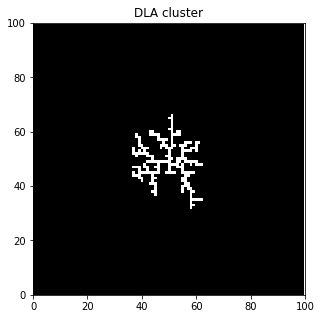

In [24]:
# release N_walkers walkers and build the DLA cluster on the lattice. 
fig = plt.figure(figsize=(5,5))
ax  = plt.axes(xlim=(0, L), ylim=(0, L))

for i in np.arange(N_walkers):
    lattice = run_walker(lattice, cluster_maxrad)
    if (np.round(i/10)==i/10):                  # signal attachment of every 10th walker
        print('Attached walker No. '+str(i))    # we do this to monitor progress
    plt.imshow(lattice, cmap='gray',  interpolation='nearest')
    plt.savefig(file_name.format(i))

movie(input_files='*.jpg', output_file='movie.html') # create a html file that the animation can be played

# now we show the final cluster lattice
plt.imshow(lattice, cmap='gray',  interpolation='nearest')
plt.title('DLA cluster')
plt.show()

#### DLA Observation

Attached walker No. 0
Attached walker No. 100
Attached walker No. 200
Attached walker No. 300
Attached walker No. 400
Attached walker No. 500
Attached walker No. 600
Attached walker No. 700
Attached walker No. 800
Attached walker No. 900
Attached walker No. 1000
Attached walker No. 1100
Attached walker No. 1200
Attached walker No. 1300
Attached walker No. 1400
Attached walker No. 1500
Attached walker No. 1600
Attached walker No. 1700
Attached walker No. 1800
Attached walker No. 1900


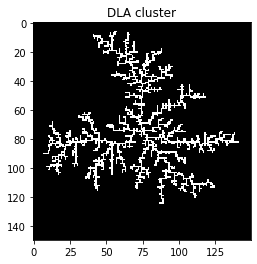

In [77]:
N_walkers = 2000                  # how many walkers in a cluster
L = 150                           # lattice size
lattice = np.zeros((L,L))         # the lattice itself
cluster_maxrad = 70               # maximum cluster radius
lattice[int(L/2), int(L/2)] = 1   # seeding the DLA cluster

for i in np.arange(N_walkers):
    lattice = run_walker(lattice, cluster_maxrad)
    if (np.round(i/100)==i/100):
        print('Attached walker No. '+str(i))

plt.imshow(lattice, cmap='gray',  interpolation='nearest')
plt.title('DLA cluster')
plt.show()

### Model Verification

**1. When the cluster size is small vs large** <br>
Cluster is assumed to be in a shape of circle that is centered at the lattice. The particles are limited to be created near the cluster, from the imaginary circle that is slightly bigger than the maximum size of the cluster. If the final cluster size is small, then the time taken for the random particle to meet the cluster would be shorter. On the other hand, if the final cluster size is large, then the time taken for the random particle to meet the cluster would be longer. These two cases are verified below.

In [58]:
import time

Attached walker No. 0
Attached walker No. 10
Attached walker No. 20
Attached walker No. 30
Attached walker No. 40


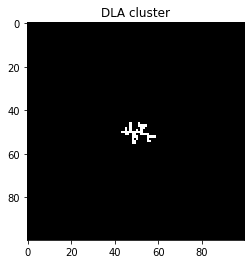

Time taken to simulate:  1.6622490882873535 seconds.


In [59]:
N_walkers = 50                    # how many walkers in a cluster
L = 100                           # lattice size
lattice = np.zeros((L,L))         # the lattice itself
cluster_maxrad = 5                # maximum cluster radius
lattice[int(L/2), int(L/2)] = 1   # seeding the DLA cluster

# time before execution
t1 = time.time()

# monitor progress - signal attachment of every 10th walker
for i in np.arange(N_walkers):
    lattice = run_walker(lattice, cluster_maxrad)
    if (np.round(i/10)==i/10):
        print('Attached walker No. '+str(i))

# now we show the final cluster lattice
plt.imshow(lattice, cmap='gray',  interpolation='nearest')
plt.title('DLA cluster')
plt.show()

# time after execution
t2 = time.time()
tt = t2 - t1
print("Time taken to simulate: ", tt, "seconds.")

Attached walker No. 0
Attached walker No. 10
Attached walker No. 20
Attached walker No. 30
Attached walker No. 40


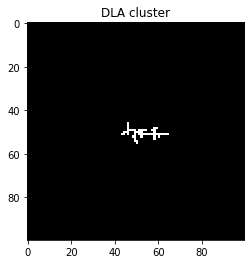

Time taken to simulate:  8.012151002883911 seconds.


In [60]:
N_walkers = 50                    # how many walkers in a cluster
L = 100                           # lattice size
lattice = np.zeros((L,L))         # the lattice itself
cluster_maxrad = 45               # maximum cluster radius
lattice[int(L/2), int(L/2)] = 1   # seeding the DLA cluster

# time before execution
t1 = time.time()

# monitor progress - signal attachment of every 10th walker
for i in np.arange(N_walkers):
    lattice = run_walker(lattice, cluster_maxrad)
    if (np.round(i/10)==i/10):
        print('Attached walker No. '+str(i))

# now we show the final cluster lattice
plt.imshow(lattice, cmap='gray',  interpolation='nearest')
plt.title('DLA cluster')
plt.show()

# time after execution
t2 = time.time()
tt = t2 - t1
print("Time taken to simulate: ", tt, "seconds.")

**2. When the number of particles is small vs large** <br>
In this case, the shape of the final cluster lattices are compared. When the number of particles is small, it is expected to show smaller size of the cluster lattice. When the number of particles is large, it is expected to show larger size of the cluster lattice, which looks more complicated and mostly with longer branches.

Attached walker No. 0
Attached walker No. 100
Attached walker No. 200
Attached walker No. 300
Attached walker No. 400


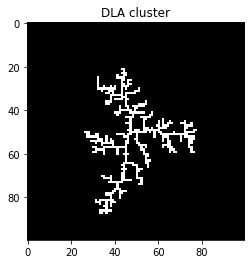

In [66]:
N_walkers = 500                   # how many walkers in a cluster
L = 100                           # lattice size
lattice = np.zeros((L,L))         # the lattice itself
cluster_maxrad = 45               # maximum cluster radius
lattice[int(L/2), int(L/2)] = 1   # seeding the DLA cluster

# monitor progress - signal attachment of every 10th walker
for i in np.arange(N_walkers):
    lattice = run_walker(lattice, cluster_maxrad)
    if (np.round(i/100)==i/100):
        print('Attached walker No. '+str(i))

# now we show the final cluster lattice
plt.imshow(lattice, cmap='gray',  interpolation='nearest')
plt.title('DLA cluster')
plt.show()

Attached walker No. 0
Attached walker No. 100
Attached walker No. 200
Attached walker No. 300
Attached walker No. 400
Attached walker No. 500
Attached walker No. 600
Attached walker No. 700
Attached walker No. 800
Attached walker No. 900


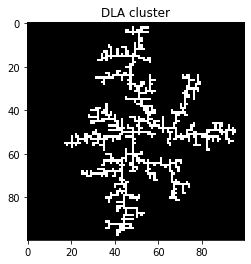

In [67]:
N_walkers = 1000                   # how many walkers in a cluster
L = 100                           # lattice size
lattice = np.zeros((L,L))         # the lattice itself
cluster_maxrad = 45               # maximum cluster radius
lattice[int(L/2), int(L/2)] = 1   # seeding the DLA cluster

# monitor progress - signal attachment of every 10th walker
for i in np.arange(N_walkers):
    lattice = run_walker(lattice, cluster_maxrad)
    if (np.round(i/100)==i/100):
        print('Attached walker No. '+str(i))

# now we show the final cluster lattice
plt.imshow(lattice, cmap='gray',  interpolation='nearest')
plt.title('DLA cluster')
plt.show()

### Discussion
#### Power Law

In [330]:
N_walkers = 100                   # how many walkers in a cluster
L = 100                           # lattice size
lattice = np.zeros((L,L))         # the lattice itself
cluster_maxrad = 45               # maximum cluster radius
lattice[int(L/2), int(L/2)] = 1   # seeding the DLA cluster
hor_max = []
dif_arr = []
par_arr = []

In [331]:
for i in range(N_walkers):
    lattice = run_walker(lattice, cluster_maxrad)
    for j in range(L):
        for k in range(L):
            if (lattice[j][k] == 1):
                hor_max.append(k)
        if(len(hor_max) != 0):
            diff = np.amax(hor_max) - np.amin(hor_max)
            dif_arr.append(diff)
            par = np.amax(dif_arr)
        hor_max = []
    dif_arr = []
    par_arr.append(par)

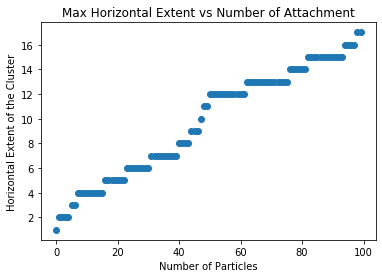

In [332]:
arr = np.arange(0,len(par_arr))
plt.scatter(arr, par_arr)
plt.xlabel("Number of Particles")
plt.ylabel("Horizontal Extent of the Cluster")
plt.title("Max Horizontal Extent vs Number of Attachment")
plt.show()

### Discussion
As presented above, I simulated DLA process with the implemented model and found a power rule that fits the maximum horizontal diameter of the cluster with respect to the number of attached particles. Above in the graph, the maximum horizontal diameter exponentially increases as the number of attached particles increases. However, the model has a limitation since the particles are designed to be created from the certain distance away from the maximum cluster size. Thus, in order to simulate the nature where some particles are displaced infinitely away from the cluster, scaling such distance with varying cluster's radius would improve the model. This could not be implemented in this project as the time taken to execute whole codes was long.